In [13]:
!pip install lux-api
!pip install xgboost

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import os,sys
import lux
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

In [14]:
df=pd.read_csv("parkinsons.csv")
df.head(n=10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [15]:
df.shape

(195, 24)

In [16]:
df.isnull().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [17]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object


In [20]:
set(df["PPE"].tolist())

{0.044539,
 0.056141,
 0.05761,
 0.068501,
 0.073581,
 0.075587,
 0.085569,
 0.086398,
 0.09147,
 0.091546,
 0.091604,
 0.093193,
 0.093534,
 0.095032,
 0.09622,
 0.09632,
 0.097336,
 0.098555,
 0.100881,
 0.101516,
 0.102706,
 0.103224,
 0.103561,
 0.105306,
 0.105993,
 0.106802,
 0.108514,
 0.112838,
 0.112856,
 0.112878,
 0.113942,
 0.11513,
 0.115515,
 0.11573,
 0.117399,
 0.119308,
 0.119652,
 0.120605,
 0.121777,
 0.123306,
 0.128872,
 0.130554,
 0.131728,
 0.132703,
 0.13305,
 0.133867,
 0.13412,
 0.135242,
 0.13639,
 0.138512,
 0.138868,
 0.141422,
 0.141929,
 0.141958,
 0.144105,
 0.144614,
 0.147403,
 0.147491,
 0.148569,
 0.151709,
 0.152428,
 0.156368,
 0.159777,
 0.160306,
 0.160376,
 0.160691,
 0.160809,
 0.160812,
 0.162999,
 0.163118,
 0.163755,
 0.164916,
 0.165827,
 0.168581,
 0.168895,
 0.169923,
 0.1701,
 0.170106,
 0.170633,
 0.173218,
 0.174152,
 0.174429,
 0.177275,
 0.177807,
 0.179677,
 0.180828,
 0.181988,
 0.183572,
 0.184067,
 0.184985,
 0.18558,
 0.185668,


In [32]:
#finging unique values in coloum
for i in df.columns:
    print("**************************************************",i,"**************************************************")
    print()
    print(set(df[i].tolist()))
    print()

************************************************** name **************************************************

{'phon_R01_S22_2', 'phon_R01_S16_5', 'phon_R01_S33_3', 'phon_R01_S43_3', 'phon_R01_S06_1', 'phon_R01_S43_5', 'phon_R01_S08_5', 'phon_R01_S19_4', 'phon_R01_S44_1', 'phon_R01_S17_3', 'phon_R01_S16_4', 'phon_R01_S25_4', 'phon_R01_S35_3', 'phon_R01_S37_6', 'phon_R01_S50_2', 'phon_R01_S04_5', 'phon_R01_S16_6', 'phon_R01_S44_5', 'phon_R01_S34_4', 'phon_R01_S06_2', 'phon_R01_S27_6', 'phon_R01_S16_1', 'phon_R01_S31_5', 'phon_R01_S10_1', 'phon_R01_S18_6', 'phon_R01_S18_5', 'phon_R01_S49_2', 'phon_R01_S22_4', 'phon_R01_S10_3', 'phon_R01_S01_2', 'phon_R01_S17_4', 'phon_R01_S32_3', 'phon_R01_S33_4', 'phon_R01_S02_2', 'phon_R01_S17_5', 'phon_R01_S43_6', 'phon_R01_S17_1', 'phon_R01_S04_1', 'phon_R01_S06_6', 'phon_R01_S34_3', 'phon_R01_S33_2', 'phon_R01_S39_4', 'phon_R01_S05_5', 'phon_R01_S32_4', 'phon_R01_S26_3', 'phon_R01_S08_3', 'phon_R01_S49_3', 'phon_R01_S37_3', 'phon_R01_S18_2', 'phon_R01

In [21]:
df["status"].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [22]:
temp=df["status"].value_counts()
temp_df=pd.DataFrame({'status':temp.index,'values': temp.values})
temp_df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

Axes(0.125,0.11;0.775x0.77)


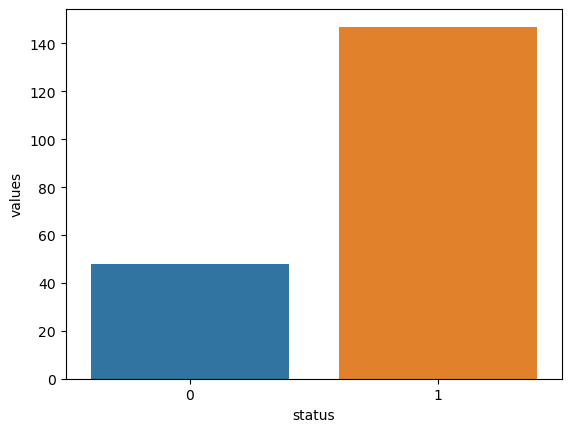

In [23]:
#check Label imbalance
import matplotlib.pyplot as plt
import seaborn as sns
temp=df["status"].value_counts()
temp_df=pd.DataFrame({'status':temp.index,'values': temp.values})
print(sns.barplot(x='status',y="values",data=temp_df))

<Axes: xlabel='PPE', ylabel='Density'>

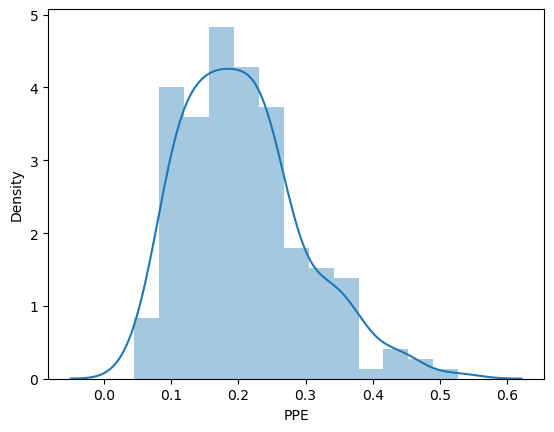

In [26]:
sns.distplot(df["PPE"])

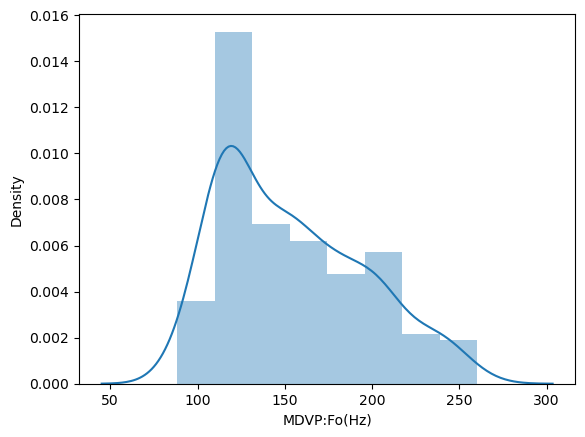

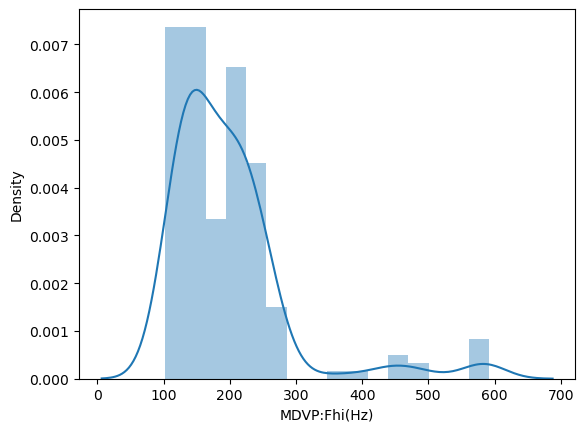

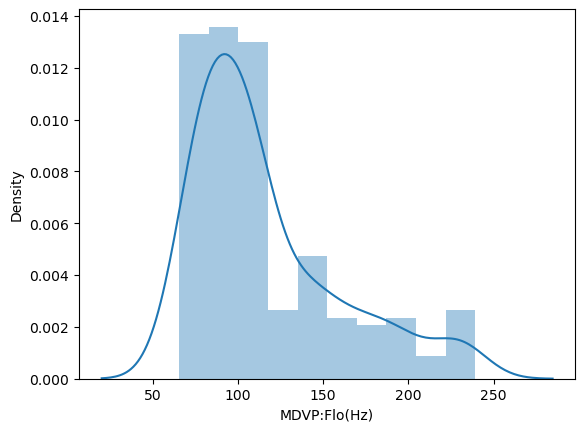

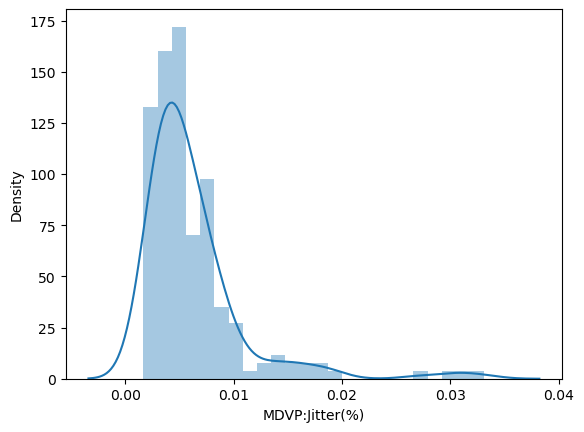

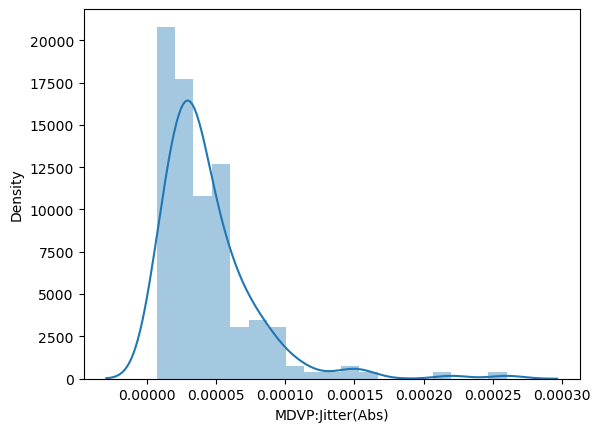

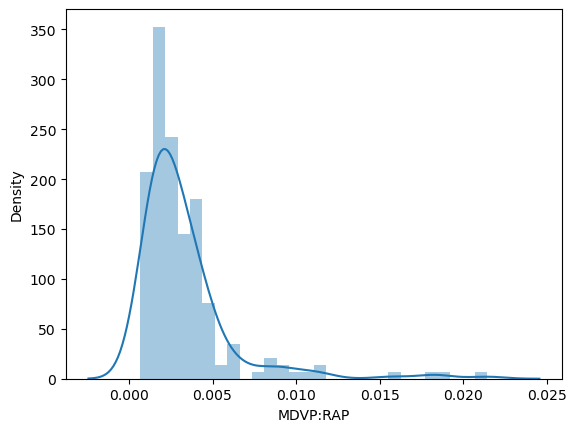

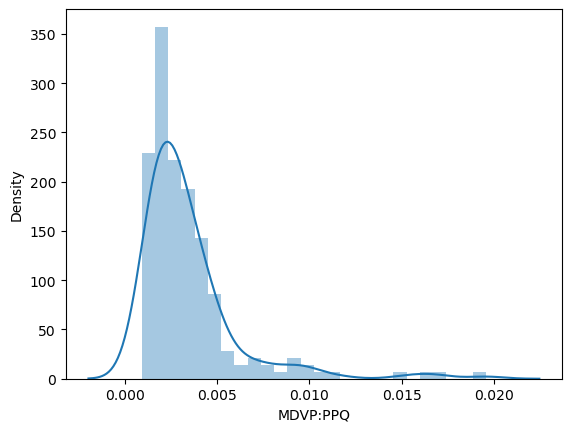

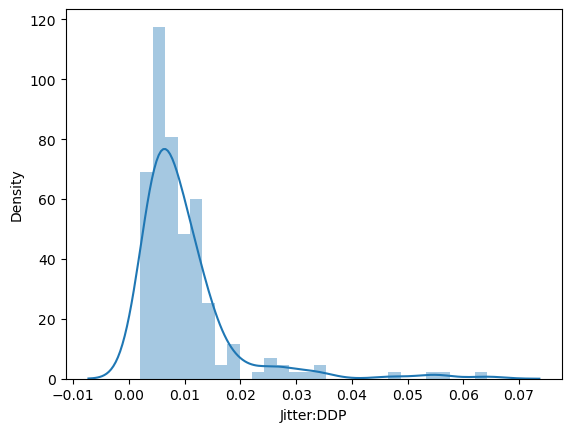

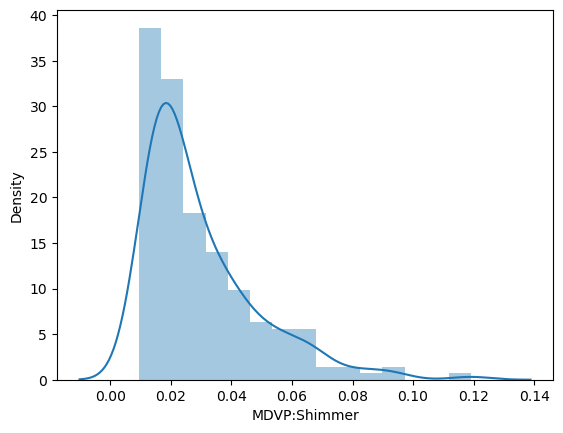

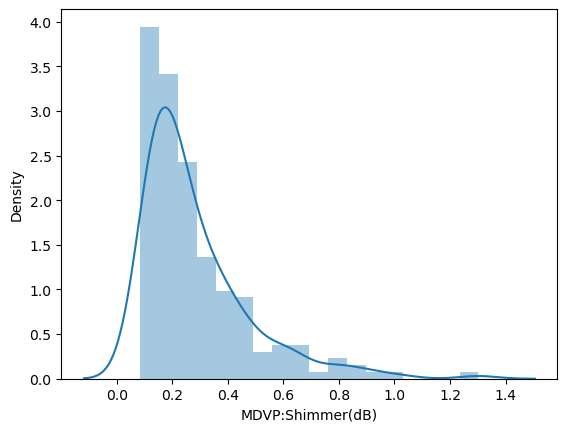

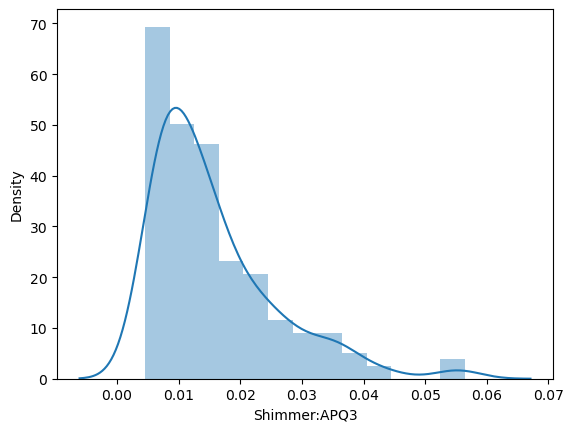

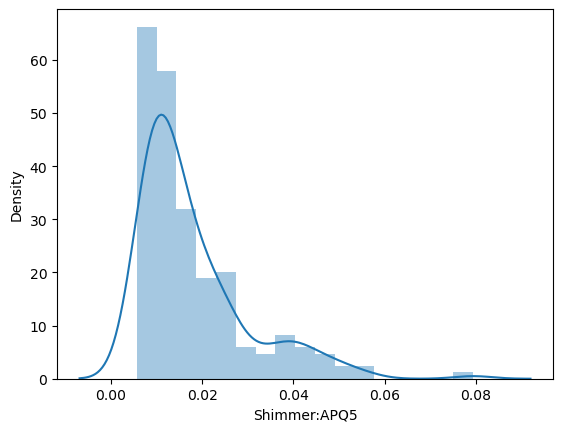

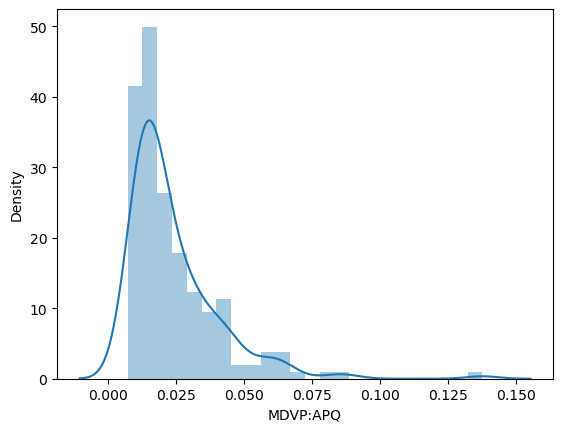

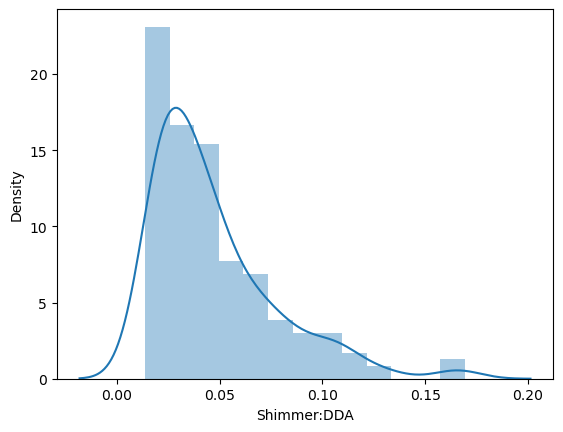

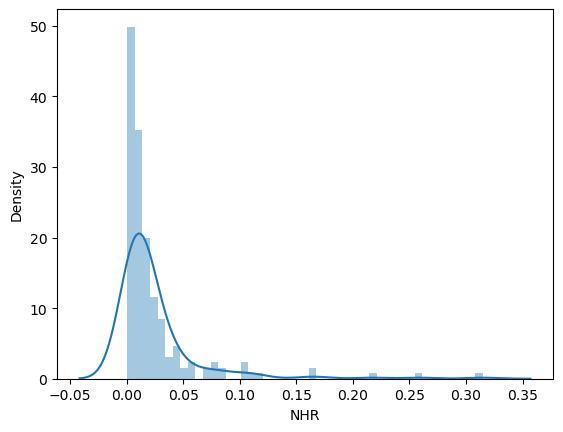

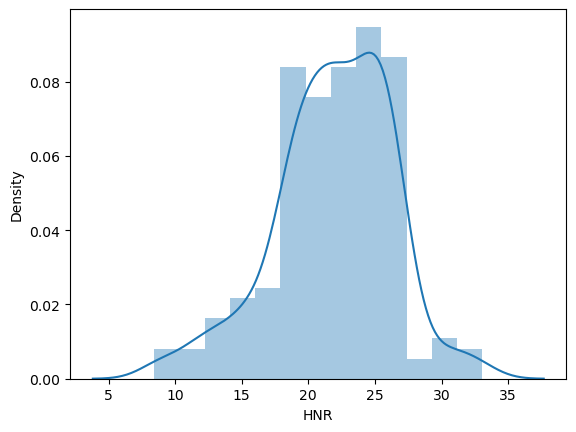

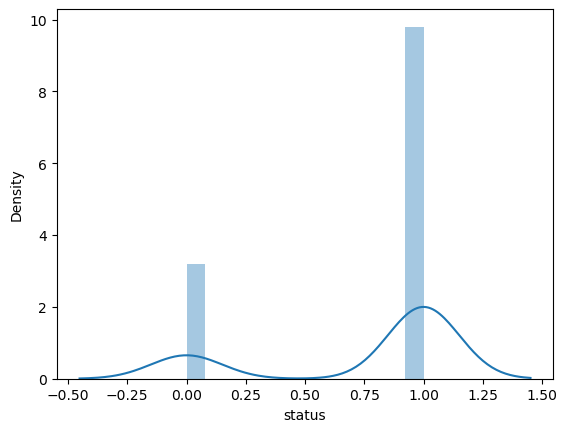

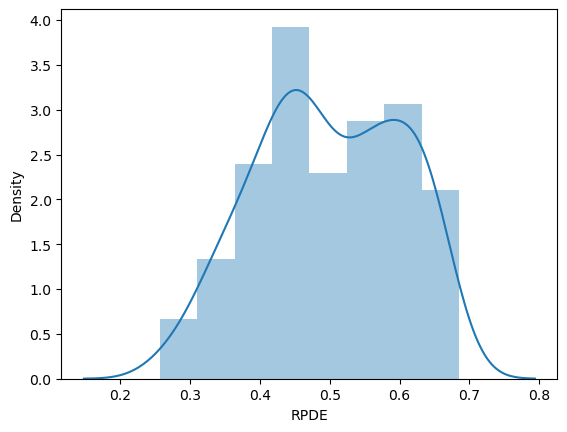

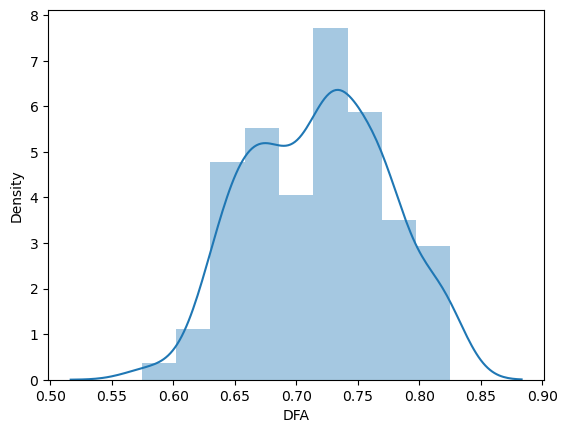

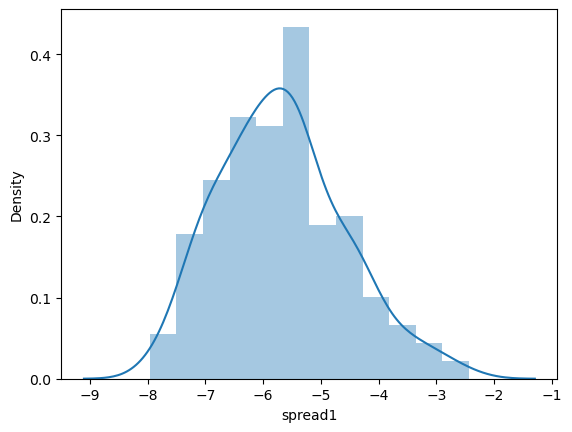

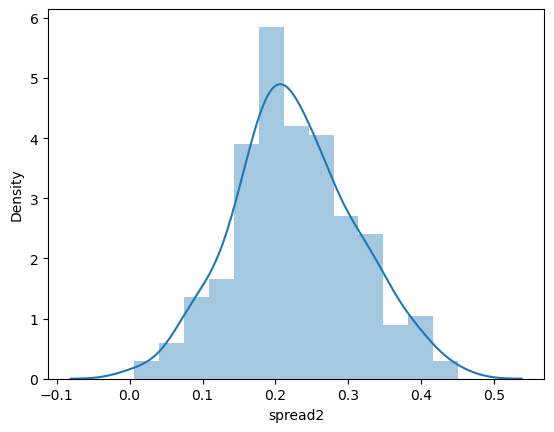

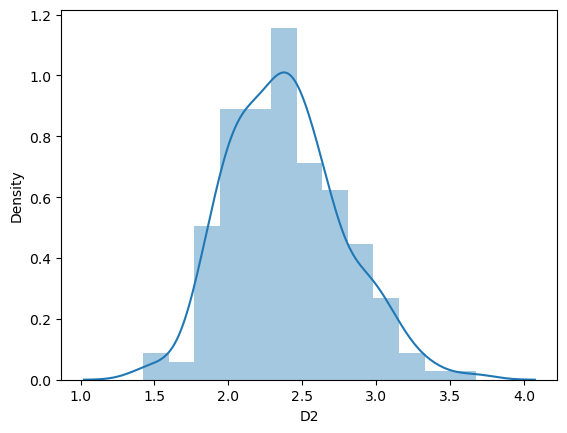

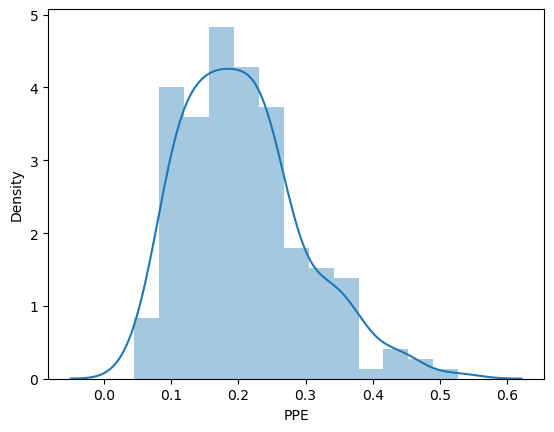

In [25]:
def distplots(col):
    sns.distplot(df[col])
    plt.show()
for i in list(df.columns)[1:]:
    distplots(i)

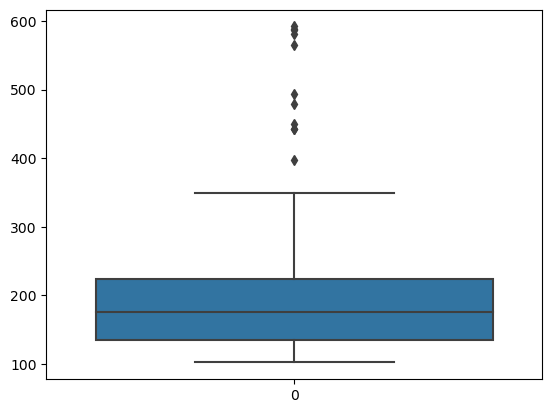

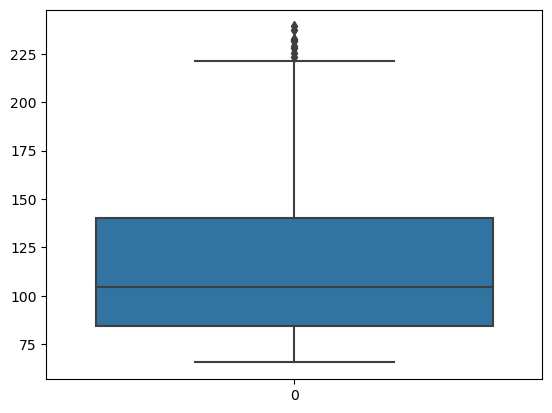

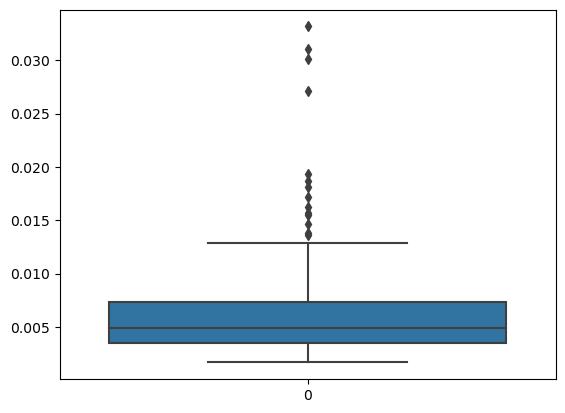

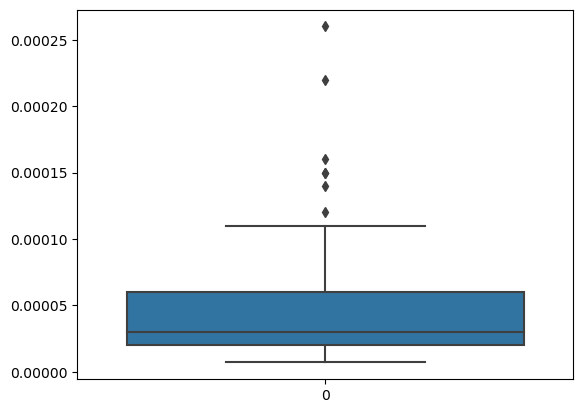

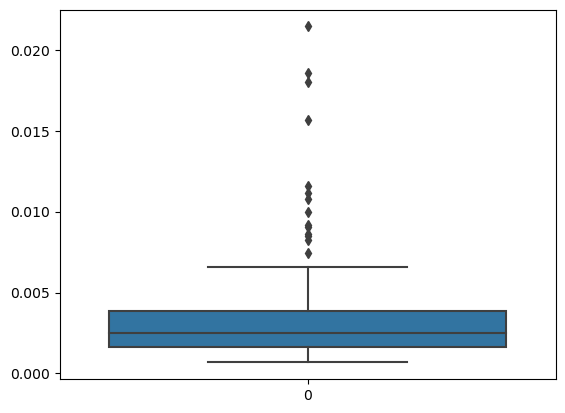

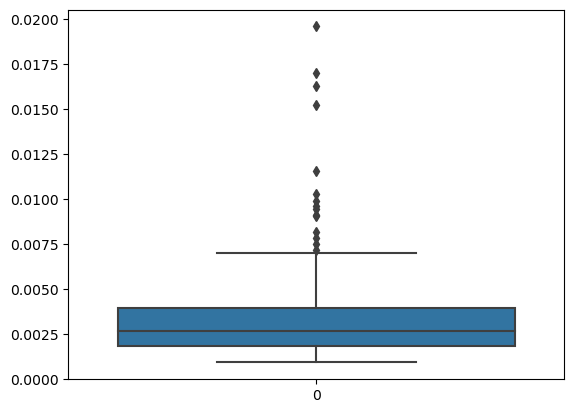

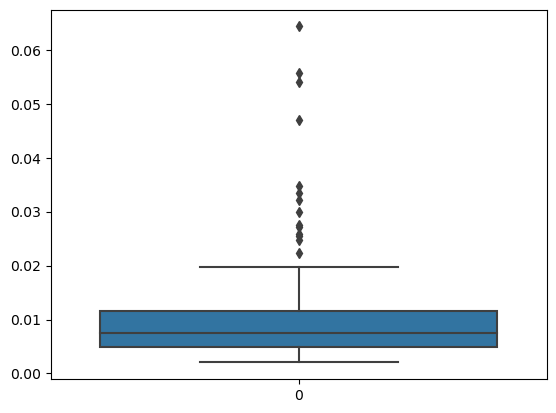

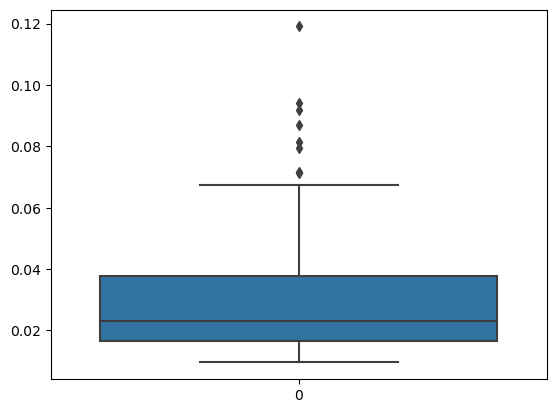

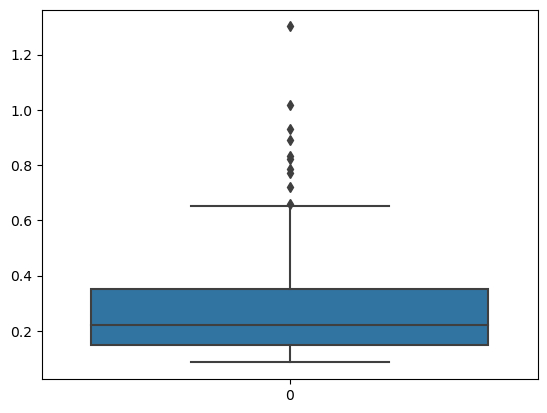

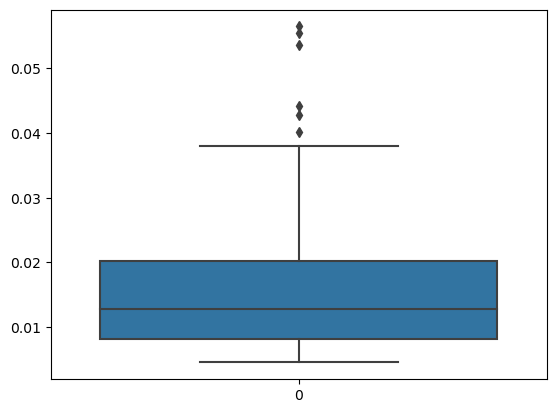

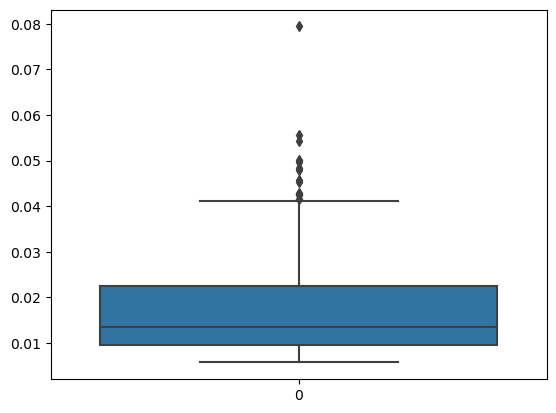

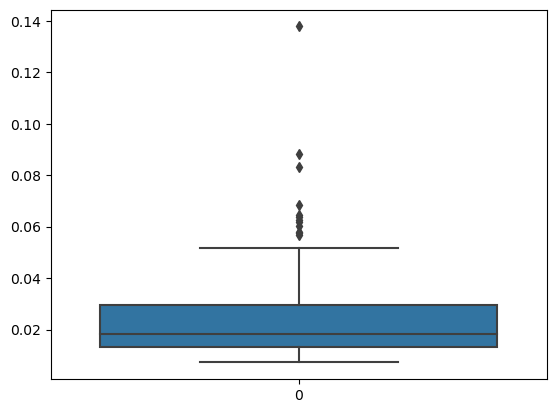

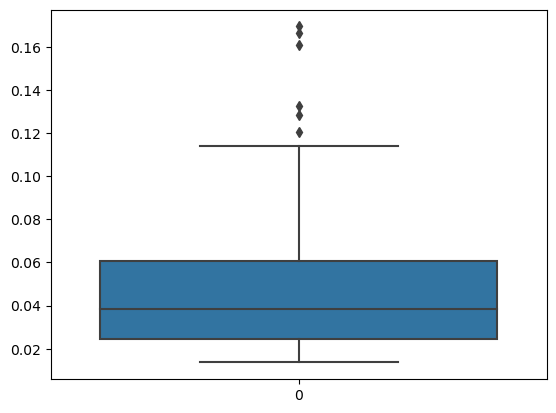

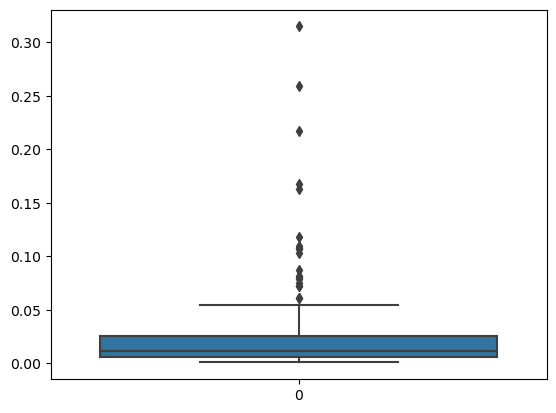

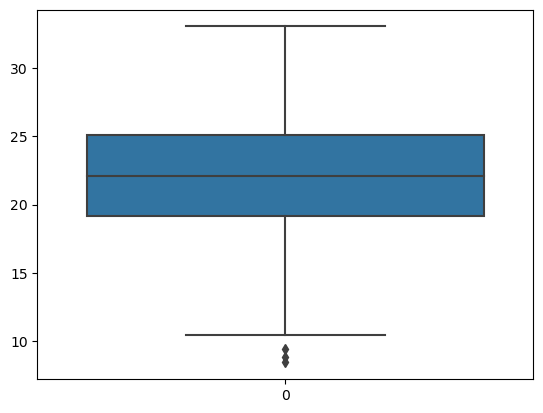

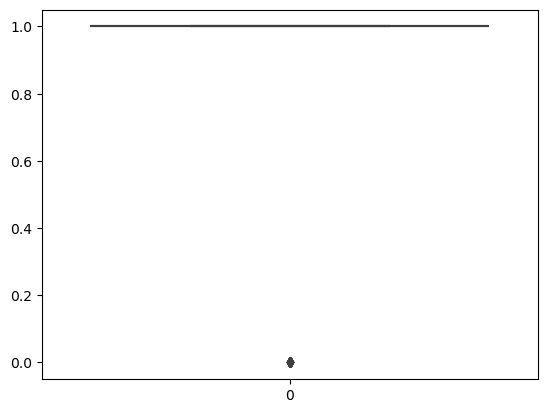

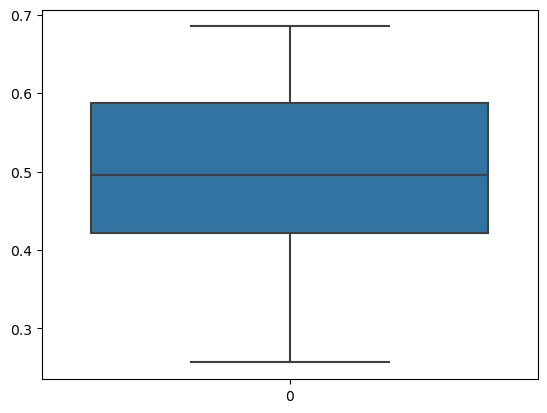

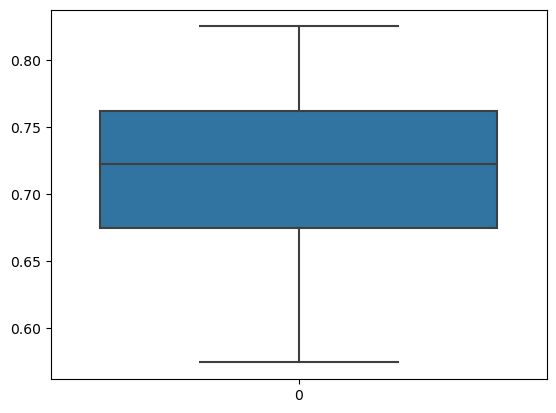

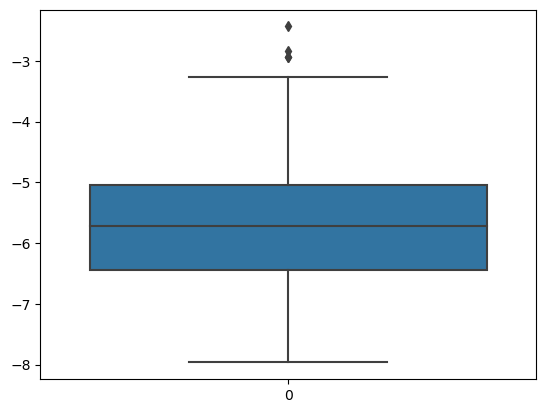

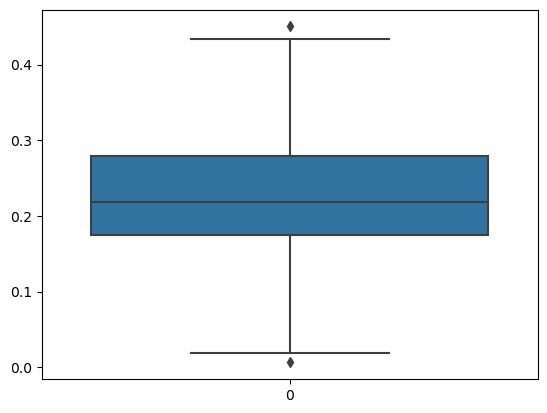

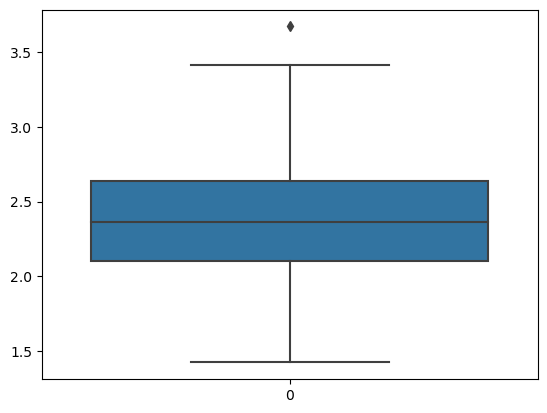

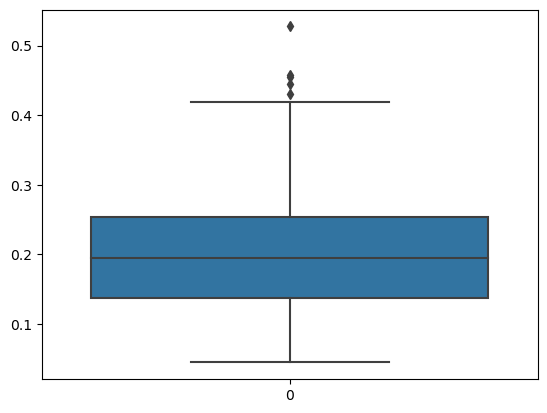

In [27]:
#find the distribution of data
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
   
for i in list(df.select_dtypes(exclude=["object"]).columns)[1:]:
    boxplots(i)

<Axes: >

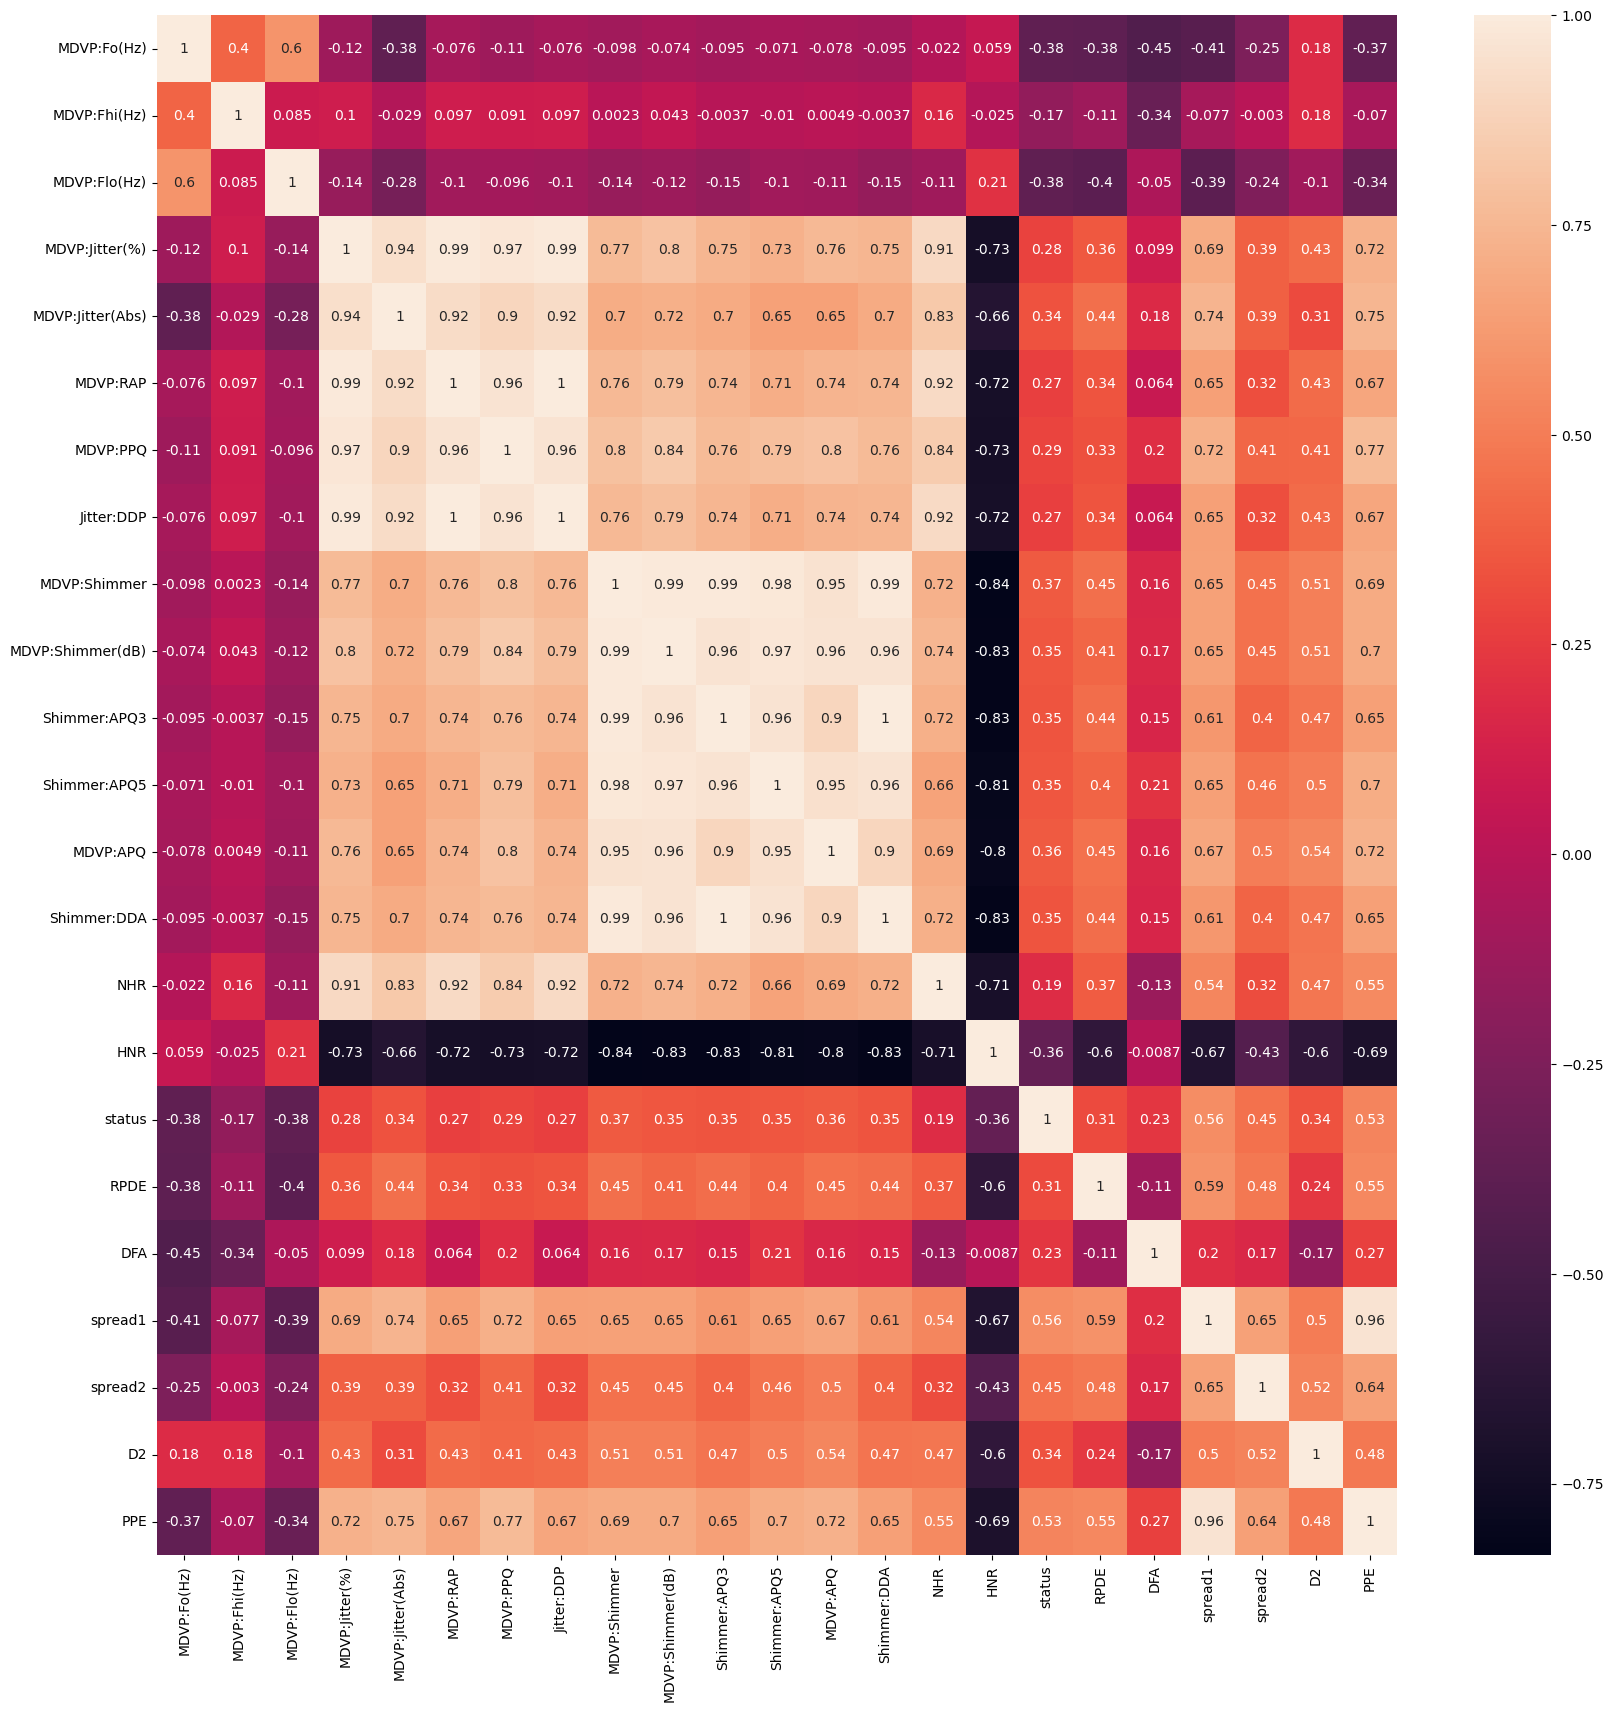

In [28]:
#finding correlations
plt.figure(figsize=(20,20))
corr=df.corr()
sns.heatmap(corr,annot=True)

In [29]:
#Lets make some final changes to the data
#seperate independent and dependent variables and drop the ID column
x=df.drop(["status","name"],axis=1)
y=df["status"]

In [39]:
from sklearn.decomposition import PCA

pca=PCA(.95)
X_PCA=pca.fit_transform(x)
print(x.shape)
print(X_PCA.shape)
#thus we need eight columns to krrp 95% of the variance

(195, 22)
(195, 3)


In [40]:
x_train,x_test,y_train,y_test=train_test_split(X_PCA,y,test_size=0.2,random_state=7)

                       Method Used  Accuracy
0              Logistic Regression  0.820513
1                    Decision Tree  0.794872
2  Random Forest(information gain)  0.794872
3           Random Forest(Entropy)  0.794872
4                              SVM  0.820513
5                              KNN  0.846154
6                              gnb  0.743590
7                              bnb  0.794872
8                           voting  0.743590
Axes(0.125,0.11;0.775x0.77)


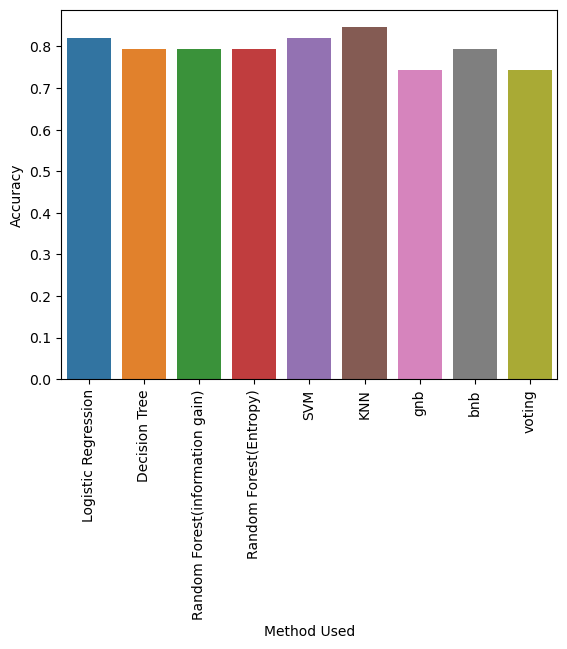

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score
list_met=[]
list_accuracy=[]
#Apply all the algorithms
#Apply all the logistic Regression
from sklearn.linear_model import LogisticRegression 
classifier=LogisticRegression(C=0.4,max_iter=1000,solver='liblinear')
lr=classifier.fit(x_train,y_train)
#precision
y_pred=classifier.predict(x_test)
#Accuracy
accuracy_LR=accuracy_score(y_test,y_pred) 

#Apply decision tree
from sklearn.tree import DecisionTreeClassifier 
classifier2=DecisionTreeClassifier(random_state=14)
dt=classifier2.fit(x_train,y_train)
#precision
y_pred2=classifier2.predict(x_test)
#Accuracy
accuracy_DT=accuracy_score(y_test,y_pred2)

#Apply random forest criteria=information gain

from sklearn.ensemble import RandomForestClassifier

classifier3=RandomForestClassifier(random_state=14)
rfi=classifier3.fit(x_train,y_train)
#precision
y_pred3=classifier3.predict(x_test)
#Accuracy
accuracy_RFI=accuracy_score(y_test,y_pred3)

#Apply random forest criteria=entropy

from sklearn.ensemble import RandomForestClassifier

classifier4=RandomForestClassifier(criterion='entropy')
rfe=classifier4.fit(x_train,y_train)
#precision 
y_pred4=classifier4.predict(x_test)
#Accuracy
accuracy_RFE=accuracy_score(y_test,y_pred4)

#similarity apply SVM
from sklearn.svm import SVC

model_svm=SVC(cache_size=100)
svm=model_svm.fit(x_train,y_train)
#precision
y_pred5=model_svm.predict(x_test)
#Accuracy
accuracy_svc=accuracy_score(y_test,y_pred5)

#Apply KNN

from sklearn.neighbors import KNeighborsClassifier

model_knn3=KNeighborsClassifier(n_neighbors=3)
knn=model_knn3.fit(x_train,y_train)
#Predicting Test set N=3
pred_knn3=model_knn3.predict(x_test)
#Accuracy
accuracy_SVM=accuracy_score(y_test,pred_knn3)

#Apply gaussian naive bayes
from sklearn.naive_bayes import GaussianNB
    
gnb=GaussianNB()
gnb=gnb.fit(x_train,y_train)
#predicting test set
pred_gnb=gnb.predict(x_test)
#accuracy
accuracy_GNB=accuracy_score(y_test,pred_gnb)
#Apply Bernouli naive bayes

from sklearn.naive_bayes import BernoulliNB

model=BernoulliNB()
bnb=model.fit(x_train,y_train)
#predicting test set
pred_bnb=model.predict(x_test)
#accuracy
accuracy_BNB=accuracy_score(y_test,pred_bnb)

#combining all above using voting classifier

from sklearn.ensemble import VotingClassifier
evc=VotingClassifier(estimators=[('lr',lr),('rfi',rfi),('rfe',rfe),('DT',dt),
                                 ('svm',svm),('knn',knn),('gnb',gnb),('bnb',bnb)],voting='hard',
                     flatten_transform=True)
model_evc=evc.fit(x_train,y_train)
#predicting
pred_evc=evc.predict(x_test)
#accuracy
accuracy_evc=accuracy_score(y_test,pred_gnb)
list1=['Logistic Regression','Decision Tree','Random Forest(information gain)','Random Forest(Entropy)','SVM','KNN','gnb','bnb',
      'voting']

list2=[accuracy_LR,accuracy_DT,accuracy_RFI,accuracy_RFE,accuracy_svc,accuracy_SVM,accuracy_GNB,accuracy_BNB,accuracy_evc]
list3=[classifier,classifier2,classifier3,classifier4,model_svm,model_knn3,gnb,model]

df_Accuracy=pd.DataFrame({'Method Used':list1,'Accuracy':list2})
print(df_Accuracy)

chart=sns.barplot(x='Method Used',y='Accuracy',data=df_Accuracy)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
print(chart)
